Gruppe: Leandro Borzyk, Malte Bauer, Florian Schrittwieser

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from scipy import signal

In [171]:
img = np.load("sample.npy")
img = np.floor(img / 2)
fltr =np.load("filter.npy")

In [172]:
def Myconv2d(a,b):
    a = np.array(a)
    b = np.array(b)
    a_shape = np.shape(a)
    b_shape = np.shape(b)
    res_shape1 = np.abs(a_shape[0] - b_shape[0]) + 1
    res_shape2 = np.abs(a_shape[1] - b_shape[1]) + 1
    res=np.zeros([res_shape1, res_shape2])
    for i in range(res_shape1):
        for j in range(res_shape2):
            res[i,j] = np.sum(
                np.multiply(
                    np.flip(b), a[i:i + b_shape[0], j:j + b_shape[1]]))
    return res

### 1.2 look-up table ###

In [173]:
Multiplier = np.zeros((256,256))
for i in range(Multiplier.shape[0]):
    for j in range(Multiplier.shape[1]):
        Multiplier[i, j] = int((i - 128) * (j - 128))

### 1.3 Why did this help us save computational costs? ###
this saves computational costs because now only values need to be looked up instead of calculating each multiplication. 

In [174]:
def My_Mult(a, b):
    '''go throw every pixel in 3x3 matrix'''
    res = np.zeros((3,3))
    for k in range(3):
        for l in range(3):
            res[k,l] = Multiplier[int(a[k,l]) + 128, int(b[k,l]) + 128]
    return res

In [175]:
def MyconvLUT(a, b):
    a = a.astype(int)
    b = b.astype(int)
    a_shape = np.shape(a)
    b_shape = np.shape(b)
    res_shape1 = np.abs(a_shape[0] - b_shape[0]) + 1
    res_shape2 = np.abs(a_shape[1] - b_shape[1]) + 1

    res = np.zeros((res_shape1, res_shape2))

    for i in range(res_shape1):
        for j in range(res_shape2):
            res[i, j] = np.sum(
                My_Mult(
                    np.flip(b), a[i:i + b_shape[0], j:j + b_shape[1]]))
    return res

### 1.4 Why does the accuracy go down? ###
accuracy should go down, since floatingpoint multiplications are reduced to integer multiplications, which results in a marginal error. Since the sample picture is only composed out of integer values the expected error value is 0.0

In [176]:
startTime = time.time()
Result_LUT = MyconvLUT(img, fltr)
LutendTime = time.time()
Result_Imp = Myconv2d(img, fltr)
manualendTime = time.time()
Result_Python = signal.convolve2d(img, fltr, mode ="valid")
pythonendTime = time.time()
checkup_lut = np.sum(np.abs(Result_LUT - Result_Python))
checkup = np.sum(np.abs(Result_Imp - Result_Python))
print(f"error lut: {checkup_lut} error manual: {checkup}")

error lut: 0.0 error manual: 0.0


In [177]:
lutTime = round((LutendTime - startTime)*1000,2)
manualTime = round((manualendTime - LutendTime)*1000,2)
pythonTime = round((pythonendTime - manualendTime)*1000,2)
print(f"lut: {lutTime}ms, manual: {manualTime}ms, signal convolution: {pythonTime}ms")

lut: 1932.58ms, manual: 1089.39ms, signal convolution: 2.55ms


measuring the actual computing times it is shown that the the signal implementation is the moste fasted of all. It need to be nooded that the LUT implementation is slower than the np.multiply function from numpy

Text(0.5, 1.0, 'LUT')

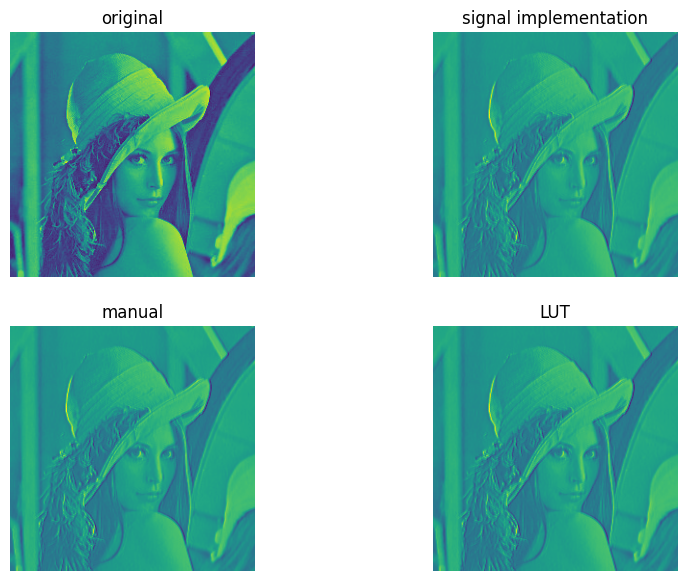

In [178]:
fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(2, 2, 1) 

# showing image 
plt.imshow(img) 
plt.axis('off') 
plt.title("original") 

fig.add_subplot(2, 2, 2) 
  
# showing image 
plt.imshow(Result_Python) 
plt.axis('off') 
plt.title("signal implementation") 

fig.add_subplot(2, 2, 3) 
# showing image 
plt.imshow(Result_Imp) 
plt.axis('off') 
plt.title("manual") 

fig.add_subplot(2, 2, 4) 
# showing image 
plt.imshow(Result_LUT) 
plt.axis('off') 
plt.title("LUT") 